In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random

evictions_file = "Evictions.clean.csv"
crime_file = "Finalcrime.csv"

Eviction_df = pd.read_csv(evictions_file)
Crime_df = pd.read_csv(crime_file)


In [2]:
Eviction_df.head()

,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP,EVICTION_ADDRESS
0,2/21/2018,Residential,MANHATTAN,10025,666 WEST END AVENUE
1,11/28/2018,Residential,BRONX,10451,281 EAST 143RD STREET
2,4/16/2019,Residential,QUEENS,11364,224-24 UNION TURNPIKE
3,2/23/2017,Residential,QUEENS,11692,613 BEACH 67 STREET
4,11/23/2018,Residential,BROOKLYN,11201,388 BRIDGE STREET


In [3]:
Crime_df.head()

,Unnamed: 0,ARREST_DATE,LAW_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Zipcode
0,363285,08/21/2018,PL 1202000,<18,M,BLACK,40.839592,-73.926330,10452.0
1,112334,08/02/2017,PL 1401500,18-24,M,BLACK,40.757068,-73.999103,10018.0
2,351363,09/08/2018,PL 1552500,18-24,M,WHITE HISPANIC,40.729082,-73.988788,10003.0
3,108328,08/07/2017,LOC000000V,18-24,F,BLACK,40.690367,-73.989739,11201.0
4,345794,09/17/2018,PL 1553005,<18,M,BLACK HISPANIC,40.814853,-73.956313,10027.0


In [4]:
renamed_eviction = Eviction_df.rename(columns={"EVICTION_ZIP": "Zipcode"})
renamed_eviction.head()

,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,Zipcode,EVICTION_ADDRESS
0,2/21/2018,Residential,MANHATTAN,10025,666 WEST END AVENUE
1,11/28/2018,Residential,BRONX,10451,281 EAST 143RD STREET
2,4/16/2019,Residential,QUEENS,11364,224-24 UNION TURNPIKE
3,2/23/2017,Residential,QUEENS,11692,613 BEACH 67 STREET
4,11/23/2018,Residential,BROOKLYN,11201,388 BRIDGE STREET


In [5]:
merged_data = pd.merge(renamed_eviction, Crime_df, on="Zipcode", how="outer")
merged_data.head()

,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,Zipcode,EVICTION_ADDRESS,Unnamed: 0,ARREST_DATE,LAW_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,2/21/2018,Residential,MANHATTAN,10025.0,666 WEST END AVENUE,216962.0,03/23/2017,PL 1201401,25-44,M,WHITE,40.79404,-73.976306
1,2/16/2018,Residential,MANHATTAN,10025.0,2508 BROADWAY,216962.0,03/23/2017,PL 1201401,25-44,M,WHITE,40.79404,-73.976306
2,6/5/2018,Residential,MANHATTAN,10025.0,6 WEST 103RD STREET,216962.0,03/23/2017,PL 1201401,25-44,M,WHITE,40.79404,-73.976306
3,9/1/2017,Residential,MANHATTAN,10025.0,2612 BROADWAY,216962.0,03/23/2017,PL 1201401,25-44,M,WHITE,40.79404,-73.976306
4,6/14/2018,Residential,MANHATTAN,10025.0,615-617 WEST 113TH STREET,216962.0,03/23/2017,PL 1201401,25-44,M,WHITE,40.79404,-73.976306


In [6]:
x_axis = merged_data.groupby(["Zipcode"])["BOROUGH"].value_counts()

x_axis

Zipcode  BOROUGH  
0.0      BRONX           1
         BROOKLYN        1
         MANHATTAN       1
1000.0   MANHATTAN       1
10001.0  MANHATTAN    3300
10002.0  MANHATTAN    2530
10003.0  MANHATTAN     875
10004.0  MANHATTAN      17
10005.0  MANHATTAN      41
10006.0  MANHATTAN      20
10007.0  MANHATTAN      57
10009.0  MANHATTAN    1750
10010.0  MANHATTAN     246
10011.0  MANHATTAN     616
10012.0  MANHATTAN     384
10013.0  MANHATTAN    1802
10014.0  MANHATTAN     384
10016.0  MANHATTAN     880
10017.0  MANHATTAN     152
10018.0  MANHATTAN     568
10019.0  MANHATTAN     528
         BRONX           2
10020.0  MANHATTAN       2
10021.0  MANHATTAN     109
10022.0  MANHATTAN     492
10023.0  MANHATTAN     242
10024.0  MANHATTAN     330
10025.0  MANHATTAN     302
10026.0  MANHATTAN     669
10027.0  MANHATTAN    3170
                      ... 
11416.0  QUEENS        142
11417.0  QUEENS        552
11418.0  QUEENS        579
11419.0  QUEENS        356
11420.0  QUEENS        952
11421.0  

In [13]:
top_crimes = merged_data.groupby(["BOROUGH"])["LAW_CODE"].value_counts()
top_crimes

BOROUGH        LAW_CODE  
BRONX          VTL0511001    11858
               PL 1200001    10398
               PL 1552500     8465
               PL 2211001     5853
               PL 2200300     4242
               PL 1201401     3393
               VTL11920U2     3156
               PL 1211100     2898
               PL 1200502     2577
               PL 1600500     2171
               VTL0511003     2162
               PL 2650101     1869
               PL 1252501     1806
               PL 12005A3     1748
               PL 140100E     1699
               PL 13052A1     1449
               PL 1651503     1449
               PL 215510D     1449
               PL 2214000     1449
               PL 2403002     1449
               TAX18140B2     1449
               VTL11920E2     1449
               PL 2212500     1442
               PL 1902300     1342
               PL 2201601     1342
               PL 265031B     1335
               PL 1200000     1170
               PL 1654505    

In [8]:
Y_axis = merged_data.groupby(["Zipcode"]).count()["LAW_CODE"]

Y_axis

Zipcode
0.0           0
1000.0        0
10001.0    3300
10002.0    2530
10003.0     875
10004.0      17
10005.0       0
10006.0       0
10007.0      57
10009.0    1750
10010.0     246
10011.0     616
10012.0     384
10013.0    1802
10014.0     384
10016.0     880
10017.0     152
10018.0     568
10019.0     530
10020.0       0
10021.0     109
10022.0     492
10023.0     242
10024.0     330
10025.0     302
10026.0     669
10027.0    3170
10028.0     327
10029.0    5050
10030.0       0
           ... 
11416.0     142
11417.0     552
11418.0     579
11419.0     356
11420.0     952
11421.0       0
11422.0     191
11423.0     428
11424.0       0
11426.0       0
11427.0      88
11428.0     174
11429.0       0
11430.0       0
11432.0    2484
11433.0    1930
11434.0    8160
11435.0    1492
11436.0       0
11439.0       0
11443.0       0
11575.0       0
11619.0       0
11691.0    4038
11692.0     560
11693.0     252
11694.0     342
11698.0       0
11753.0       0
12221.0       0
Name: LAW_CODE, 

ValueError: x and y must be the same size

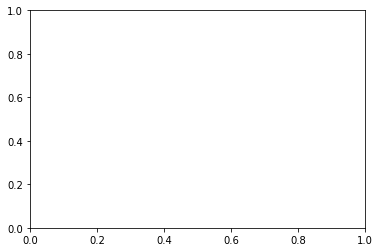

In [9]:
plt.scatter(x_axis,Y_axis, facecolors = "Red",edgecolor = "Black", marker = "o")